# Import Neccessary Libraries


In [1]:
#Import neccessary Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import  statsmodels.formula.api as smf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import tensorflow as tf

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel ('ERROR')

In the section of code above, they are importation of all the neccessary libraries needed for performing exploritory analysis, data preprocessing, data visualisation, and machine learning model building to predict the housing prices by using the data within the "California Housing Prices" dataset.

# Section 1: Exploratory Data Analysis (EDA)

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The code above represents the action to import the "drive" module from the "google.colab" package. The google.colab package is a Python library provided by Google Colab, which allows interaction between various Google services, including Google Drive, within the Colab environment.

In [3]:
HOUSING_PATH = "data"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
#Reading the housing.csv file into Pandas Dataframe
path = "/content/drive/MyDrive/Machine Learning/housing.csv"
df = pd.read_csv(path)

This line of code imports the "California Housing Prices" dataset as it path finds the file using its pathing directory "/content/drive/MyDrive/Machine Learning/housing.csv".

In [5]:
#Reading the housing.csv
pd.read_csv('/content/drive/MyDrive/Machine Learning/housing.csv')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


The code above is used to view and display the dataset using the Pandas Dataframe.

# Section 2: Overview of the Dataset

In [6]:
#Overview the dataset using EDA head method to see the first five rows of data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


df.head() is a dataframe function that elicits and reviews the first five rows of data from the "California Housing Prices" dataset.

In [7]:
#Overview the dataset using EDA info method to see the general info of the data e.g. data types and memory usage etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


df.info() is a function that reviews all the datatypes of each row of attribute within the dataset, it also display other relevant information such as memory usage and number of total data columns.

In [8]:
#Data Analysis (Count, Mean, Standard Deviation, Minimum, Maximum)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


df.describe() is a function that performs different types of data analysis on the data given in the dataset. It useful in finding all the analytical values for gaining knowledge from the data.

In [9]:
#Check for missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

This line of code checks for missing values and null data which needs to be dropped or imputed to ensure data integrity for accurate prediction performance later on into the process.  

In [10]:
#Check for duplicated values in the dataset
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

This line of code checks for duplicated values which needs to be dropped if needed to ensure data integrity for accurate prediction performance later on into the process.  

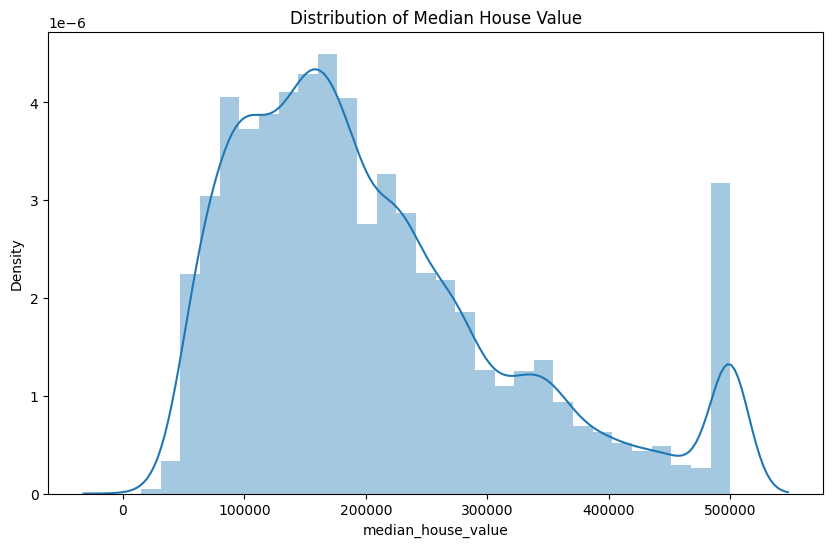

In [11]:
#Unvariate analysis (Initial visualisation before preprocessing to spot unusual patterns and anomalies)
plt.figure(figsize=(10, 6)) # Create a new figure and set size to 10 inches wide and 6 inches tall.
sns.distplot(df['median_house_value'], bins=30) # Generates a distribution plot (aka. histogram with kernel density estimate) for the 'median_house_value' column
plt.title("Distribution of Median House Value") # Sets the title of the plot
plt.show() # Display the plot

**Code Explanation:**

The code above performs unvariate analysis (exlpores each variable in a dataset separately) on the 'median_house_value' column of the DataFrame 'df' by visualising its distribution using a distribution plot from the Seaborn library.

**Graph Explanation:**

The histograph represents the distribution of median house value, using the graph we are able to tell that the highest density in house values are the houses that are priced at $100000, $200000, and $500000 meaning houses valued at these prices is the majority portion.

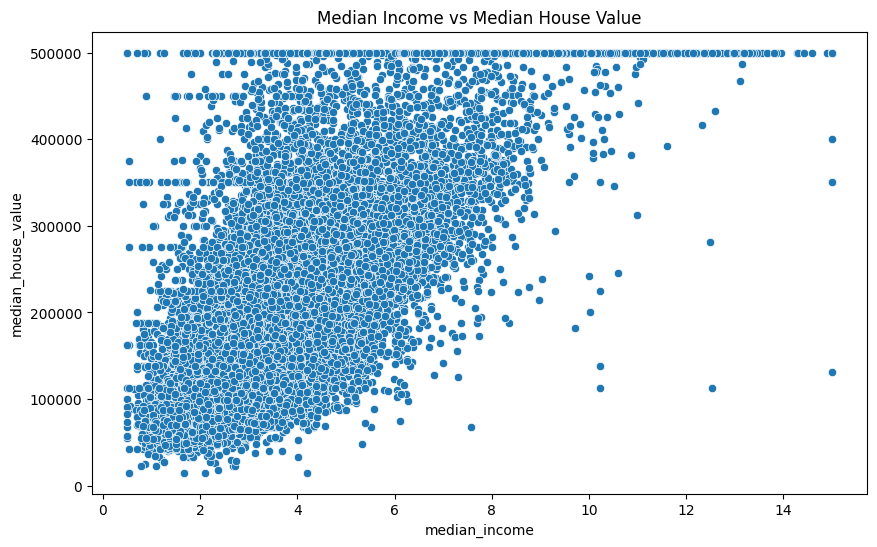

In [12]:
#Bivariate analysis (Initial visualisation before preprocessing to spot unusual patterns and anomalies)
plt.figure(figsize=(10, 6)) # Create a new figure and set size to 10 inches wide and 6 inches tall.
sns.scatterplot(x='median_income', y='median_house_value', data=df) # Generates a scattered graph for 'median_income' and 'median_house_value'
plt.title("Median Income vs Median House Value") # Set the title of the scattergraph to "Median Income vs Median House Value"
plt.show() # Display the scattergraph

**Code Explanation:**

The code above performs bivariate analysis (the analysis of two variables to determine relationships between them) on the 'median income' and 'median_house_value' column of the DataFrame

**Graph Explanation:**

The scattergraph shows that most houses are acquired by  people who has a median income of 1 to 8 thousand dollars a month, and we are also able to tell that most people who reside in the state of California have a median income of 1 to 8 thousand dollars a month but not so much residents who earns over 10 thousand dollars a month. The scattergraph also tells us that people who bought houses with values of less than $500000 are only the people who has a median income of lower than 8 thousand dollars a month, which makes sense because the richer you are the more you are willing to spend.

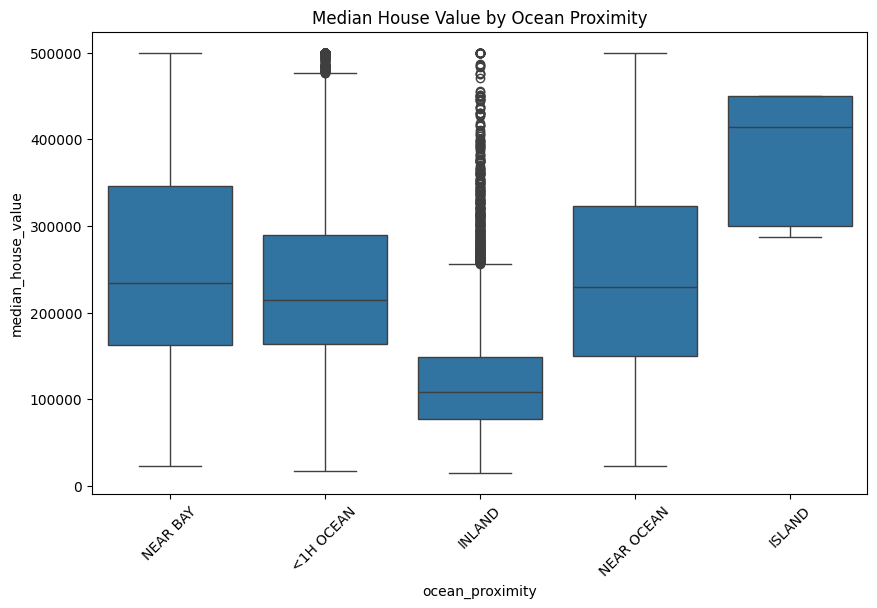

In [13]:
#Categorical analysis (Initial visualisation before preprocessing to spot unusual patterns and anomalies)
plt.figure(figsize=(10, 6)) # Create a new figure and set size to 10 inches wide and 6 inches tall.
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df) # Generates a boxplot graph for 'ocean_proximity' and 'median_house_value'
plt.xticks(rotation=45) # rotates and move the position of the plots
plt.title("Median House Value by Ocean Proximity") # Set the title of the scattergraph to "Median House Value by Ocean Proximity"
plt.show() # Display the boxplot graph

**Code Explanation:**

The code above performs Categorical analysis (the analysis of data where the response variable has been grouped into a set of mutually exclusive ordered (such as age group) or unordered (such as eye colour) categories) on the 'ocean_proximity' and 'median_house_value'

**Graph Explanation:**

The boxplot shows the distribution of median house values for each category of ocean proximity. The box represents the interquartile range (IQR), with the middle line indicating the meidan value. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the box edges. The usefulness of the boxplot is that you are able to compare the median house values across different ocean proximity categories (higher the median values represents higher housing prices). The boxplot could also help identify outliers data shown as the individual points beyond the whiskers, and it may indicate errors, unusual cases, or extreme values that need further investigation. All these information is critical for eliciting further data preprocessing or transformation tasks. Additionally, it can provide initial insights into the relationship between ocean proximity and housing prices, which can be further explored through statistical analysis or machine learning models.

<Figure size 1200x800 with 0 Axes>

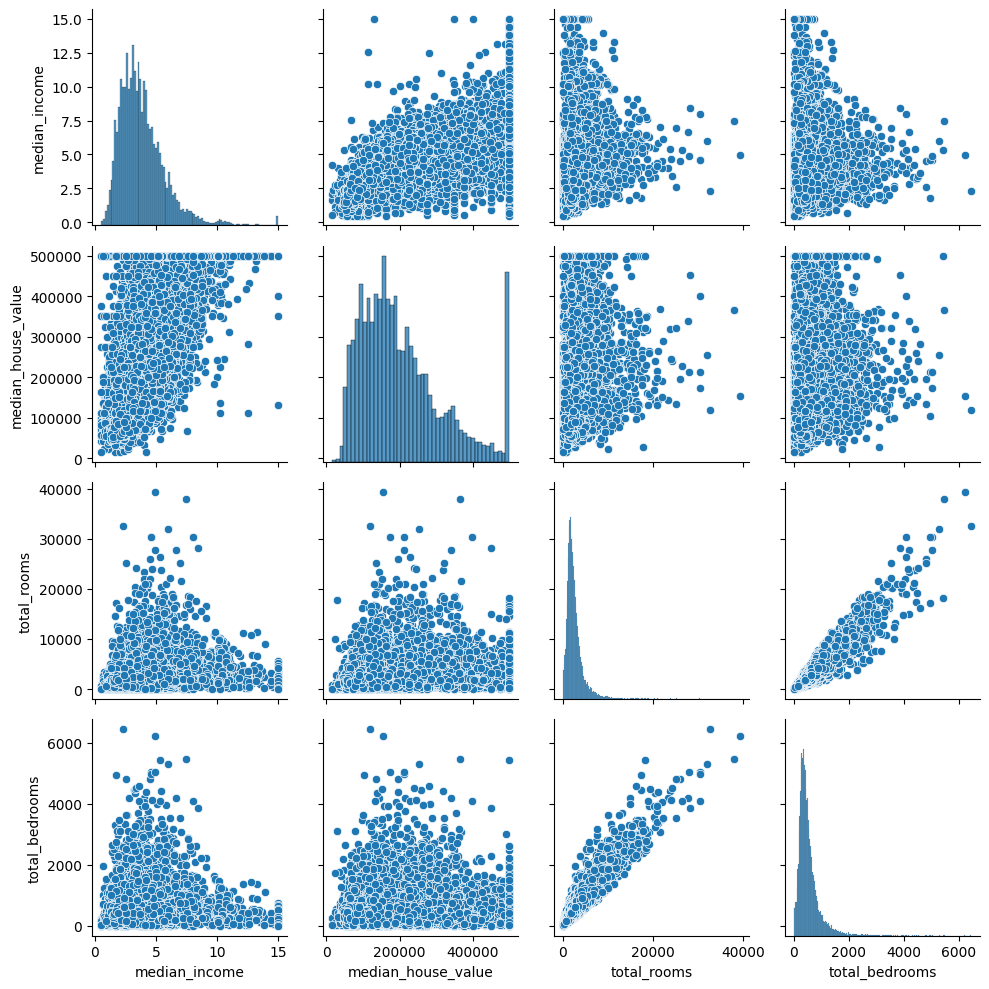

In [14]:

#Multivariate analysis (Multivariate visualisation to spot outliers patterns)
plt.figure(figsize=(12,8))
sns.pairplot(df[['median_income', 'median_house_value', 'total_rooms', 'total_bedrooms']])
plt.tight_layout()
plt.show()

**Code Explanation:**

The code above performs multivariate analysis (involves evaluating multiple variables to identify any possible association among them) which is a matrix of scatter plots that shows the pairwise relationships between the selected columns('median_income', 'median_house_value', 'total_rooms', and 'total bedrooms') from the DataFrame 'df'.

**Graph Explanation:**

The image shows a pairplot visualisation, which is a useful tool for multivariate analysis that helps identifying any outliers for each variable through histograms or kernel density esimates (KDE). You can observe the shape of distribution to be able to identify potential skewness, and detect outliers. The off-disgonal plots display scatter plots for each pair of variables. These scatter plots allow you to visually inspect the relationship between two variables, such as the correlation, linearity, or the presence of any patterns or clusters. The scatter plots also reveal the strength of the correlation between variables (if the points are tightly clustered along a line then it represents a strong linear correlation, otherise if it's randomly scattered then it suggests a weak or no correlation between the variables). By examining the pairwise relationships across multiple variables, we can gain insights into the potential importance or relevance of certain variables in relation to the target variable(median_house_value).

# Section 3: Further Data Visualisation

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

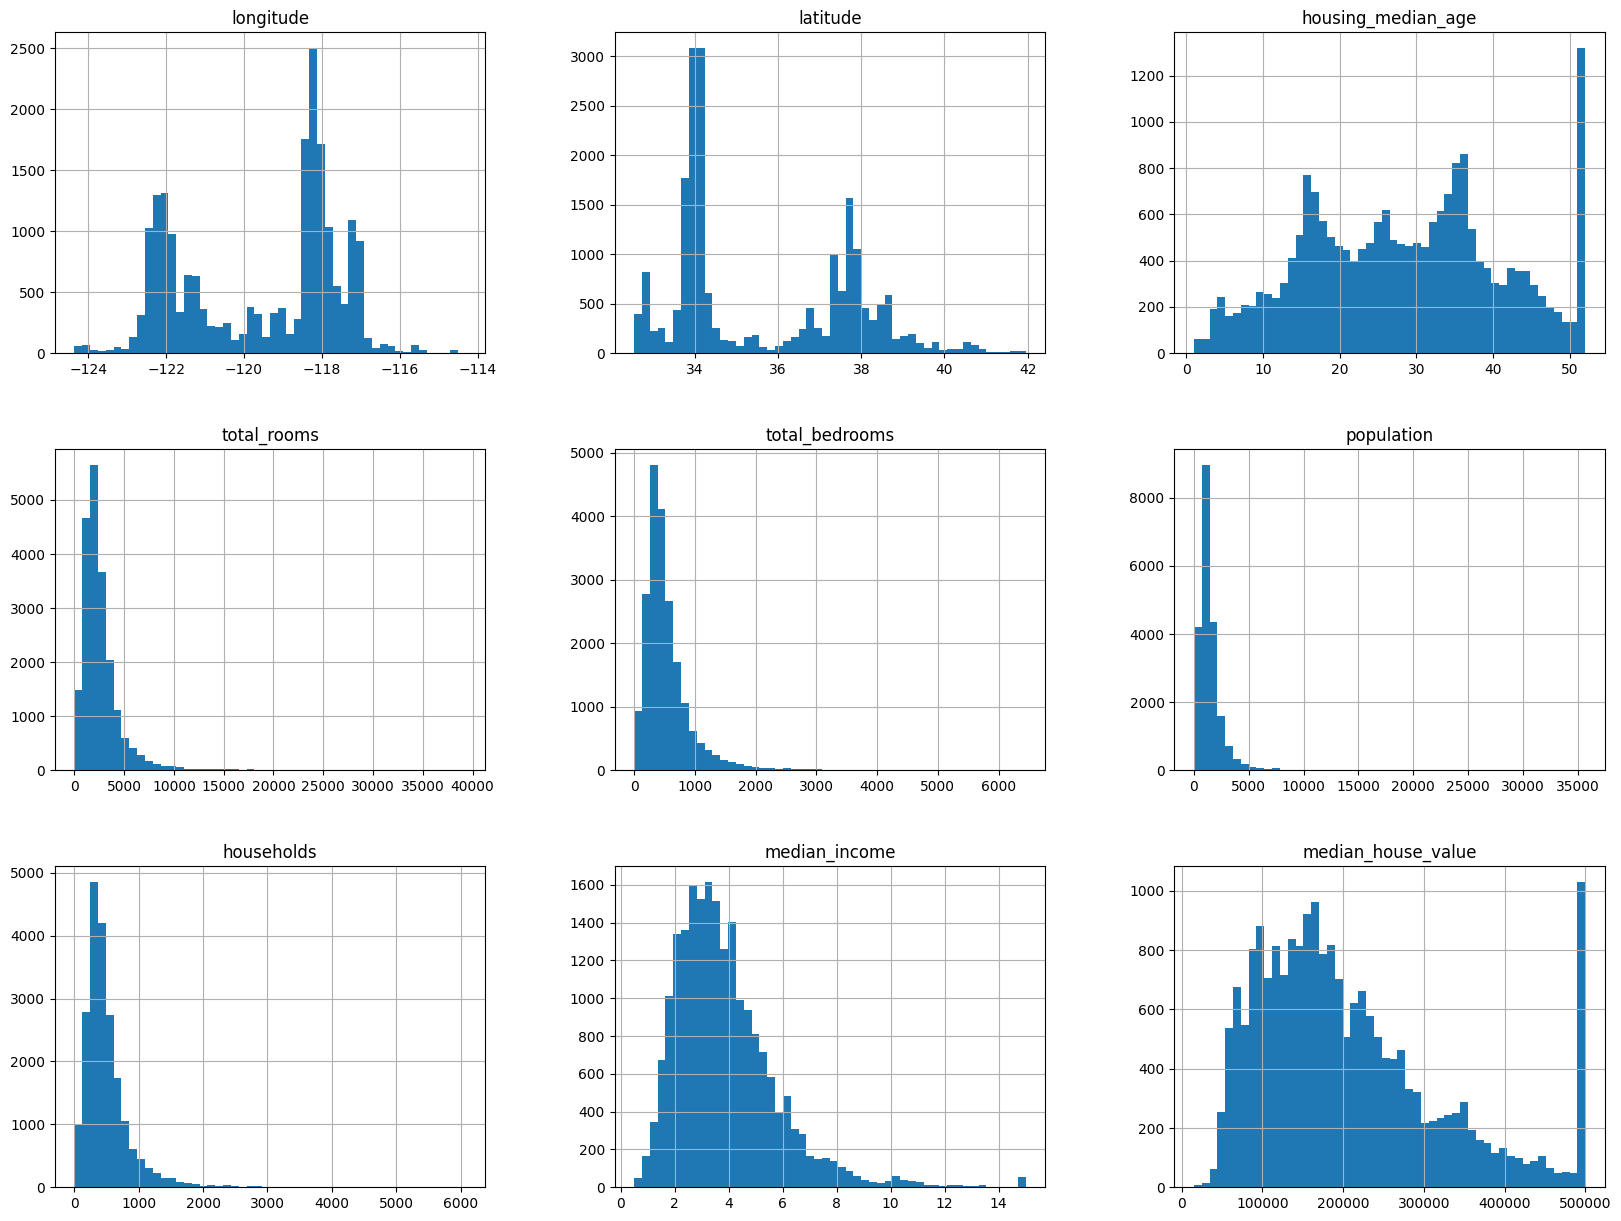

In [15]:
#Plotting histogram graphs for each of the data columns in the DataFrame
df.hist(bins=50, figsize=(20, 15))

**Code Explanation:**

The code above plots a number of histograms that represent the distributions of data across all variables (e.g median house value). The "df.hist()" function generates a histogram for each data variable and the "bins=50" argument which specifies that the histograms should have 50 bars for grouping the data; the other "figsize(20, 15)" argument creates a new figure with a specified size (12 inches wide and 6 inches tall) for plotting.

**Graph Explanation:**

The histograms display the distribution of values for each variable in the dataset. You can observe the shape of the distribution, such as whether if it is symmetric (normal or bell-shaped), skewed (leaning towards the left or right), bimodal (two peaks), or multimodal (multiple peaks). The histograms can reveal the central tendency of the data, which is the locaiton where the values are concentrated. You can identify and figure out the mode, mean, and median based on the shape of the distribution. The width of the histogram bars indicates the spread of variability of the data. A wide distribution suggests high variability, while a narrow distribution indicates low variability in the data. The histograms can also help identify potential outliers as the other graphs, they are represented by bars far away from the main body of the distribution (there are outliers in housing_median_age and housing_median_value). Histograms can reveal whether if a variable has a single mode (unimodel), two modes (bimodel), or multiple modes (multimodel). Multimodel distributions may indicate the presence of subgroups or distinct patterns within the data.

<Axes: xlabel='longitude', ylabel='latitude'>

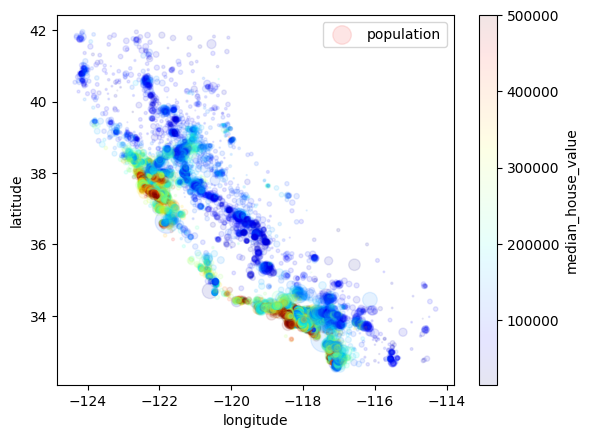

In [16]:
#Scattergraphs for showing the relationships of data in the DataFrame
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
        s=df["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"))

**Code Explanation:**

The code above plots a scatter graph using the latitude, longitude, population, and median house values to show the relationship and correlation between these different valuse, the graph plots are also coloured using "c" and a python predefined colour map called "jet".

**Graph Explanation:**

The plotted map entails the strength of population in different areas of California and the value of the houses in those areas based on their colours, the more closer to red the more expensive the houses are and more closer to blue the less expensive the houses are.

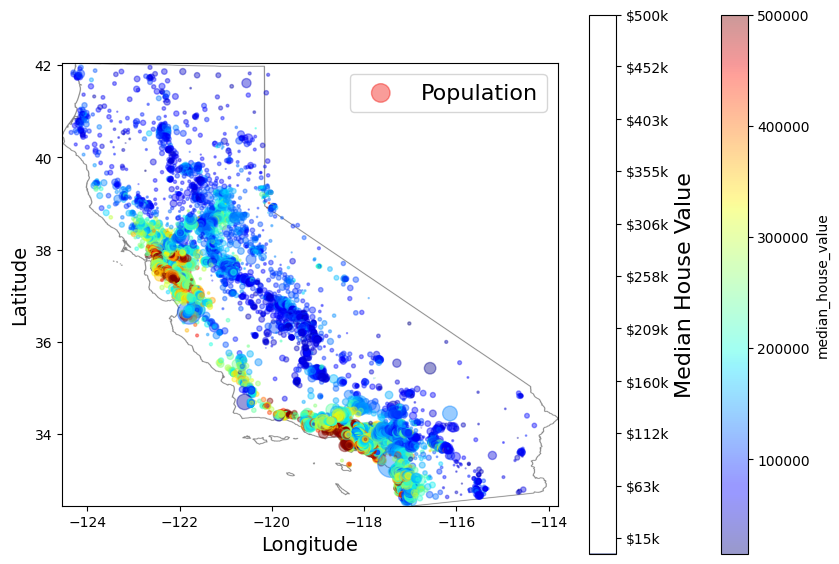

In [17]:
#Geographical distribution of housing units
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Access the 'california.png' image file using the appropriate directory
PROJECT_ROOT_DIR = os.path.dirname(os.path.abspath(path))
california_img = mpimg.imread(os.path.join(PROJECT_ROOT_DIR, 'california.png'))

# c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7), s=df['population']/100, label="Population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)

# Creating the plot later (doing the plot with colorbar=False) creates some sort of scaling issues.
cbar = plt.colorbar(ax=ax)
cbar.ax.set_yticks([int(round(v/1000)) for v in tick_values])
cbar.ax.set_yticklabels(["${0:d}k".format(int(round(v/1000))) for v in tick_values])
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

**Code Explanation:**

The code above creates a geographical distribution map using the 'latitude', 'longitude', and 'median_house_value' data. First, the code imports all the neccessary libraries and then accesses the 'california.png' image file using the approprate directory. Once the image file is loaded successfuly then it will map the values using attribute "c" and attribute "s". The attribute "c" is the attribute for mapping on the colours of the scatter plots and attribute "s" which is the attribute for adjusting the circle size of the plots. After, x and y axis labels have been added to describe the two axis of data and what they mean. In addtion, two scales are plotted next to the graph to show the median house values using different range of prices in US dollars and strength of colours.

**Graph Explanation:**

The graph shows population density and value in houses across the carlifornia state. We can tell that the places that have the highest value of houses plotted as red are the areas in the west and south of California where also are the two mostly populated areas in terms of population density. The houses within the two highlighted areas are the only areas that have houses that are valued close to $500k since the is population high which could mean high popularity as you could see the median house value is represented by the coloured scale on the right side of the graph showing the value of houses in US dollars and strength or colours.
Therefore, a knowledge is gained that the more popular an area is the more expensive the house values would be.

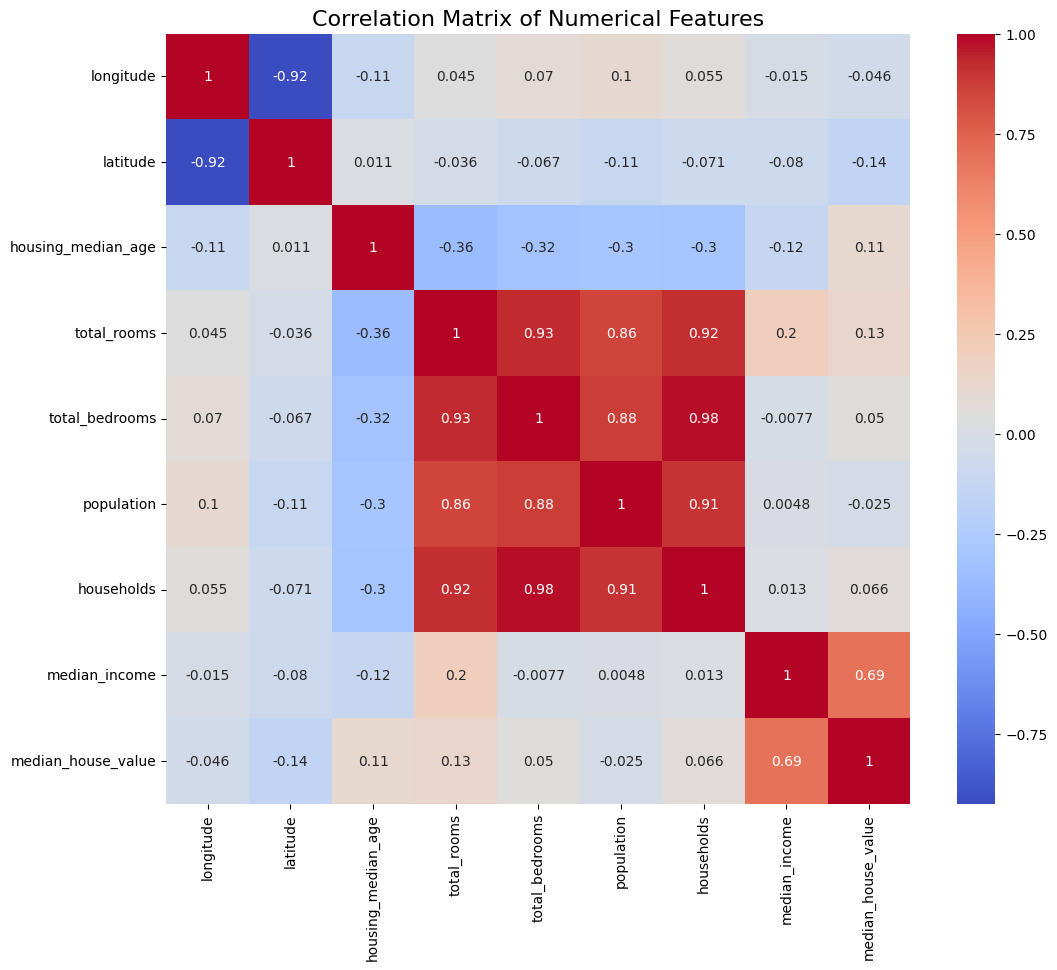

In [18]:
#Heatmap of the dataset
numerical_cols = df.select_dtypes(include=[np.number]).columns

#Create a correlation matrix
corr_matrix = df[numerical_cols].corr()

#plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

**Code Explanation:**

The code above creates a heatmap of the correlation matrix between the numerical features in the dataset. First, it selects only the numerical columns using "df.select_dtypes(include=[np.number]).columns". Then, it calculates the correlation using "corr_matrix = df[numerical_cols].corr()". The "sns.heatmap" function from the Seaboen library is used to visualise the correlation matrix as a heatmap. The "annot=true" argument displays the correlation values in each cell of the heatmap. The "cmap='coolwarm' argument specifies a divergin colour map, where positive correlations are represented by warm (reds) colours to show a positive correlation and cool (blue) colours to show a negative correlation.

**Graph Explanation:**

The heatmap can help identify correlations between features and the target variable (median house value). Strong positive or negative correlations are represented by the different shades of red and blue colours and the scale from negative to positive values (closer it is to 1 the more correlation there is etc), they indicate important features that might be useful for predicting the target variable. However, it is important to note that correlation does not neccessary imply causation, and further analysis may be required to determine the significance and usefulness of these correlations.

# Section 4: Correlation Matrix (Correlation Information)



In [19]:
#Viewing the ocean proximity in numerical values
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

The code above views the data attributes to the ocean proximity variable in numerical values.

In [20]:
#Encode categorial variable "ocean_proximity" and convert it to numerical values
encoder = LabelEncoder()
df_ocean=df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

#Check the encoded values
print(df['ocean_proximity'].value_counts())

ocean_proximity
0    9136
1    6551
4    2658
3    2290
2       5
Name: count, dtype: int64


The code above first convert the 'ocean_proximity' column to nbumeric values using "LabelEncoder" from scikit-learn. The "fit_transform" method assigns an unique integer value to each distinct string label in the 'ocean_proximity' column. This approach can be useful for some machine learning algorithms or models that require numerical feature to perform accurate data predictions.

In [21]:
#Correlation Matrix
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.014768
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014768,-0.070282,-0.018186,-0.014957,0.081750,1.000000


The code above shows the full correlation of all the pairs of variables in the data, it shows how closely related two variables are or how much one variable changes as the other variable change (dependency and indepedency). Positive values means that the variables are the exact same, negetive values means that they are the exact opposite, and values of zero means that there no correlations at all between the variables.


In [22]:
#Identify the highest corrlelated values in the dataset and sorted in descendent order
corr_matrix=df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The code above identifies and shows the highest correlated values in the dataset and sort the values in a descending order. In the correlations we can tell that median house value is closely correlated with the median income(where richer people lives that house prices are more expensive), and it also tells us that the houses up north of California tends to be cheaper than the house in the south of California.

# Section 5: Data Cleaning and Preprocessing


In [23]:
#Dropping the obseravation of missing values of total number of bedrooms
df_na=df.dropna(subset=["total_bedrooms"])
df_na.shape

(20433, 10)

The code above drops the missing values in the total number of bedrooms data column but retains the feature as a whole.

In [24]:
#Binary variables for Inland and Near Ocean Houses
dummies=pd.get_dummies(df_na.ocean_proximity).astype(int)
df_na_dummies=pd.concat([df_na, dummies], axis="columns")
df_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0,0,0,1,0


The code above sets the 'ocean_proximity' variables to binary values 0 or 1 to represents the ocean proximity of houses in certain area. [column label: 0= <1hr Ocean, 1 = INLAND, 2 = ISLAND, 3 = NEAR BAY, 4 = NEAR OCEAN]. The column values had to be converted into numerical values to perform correlation matrics.

In [25]:
#Dropping the ocean proximity and ISLAND data column and store the data in a new dataset
df_clean=df_na_dummies.drop(['ocean_proximity'], axis='columns')
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


The code above drops the 'ocean_proximity' variable because it is a categorical variable in case of future errors.

In [26]:
#Dropping one of the binary variable
df_clean=df_na_dummies.drop(['ocean_proximity', 2], axis='columns')
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


The code above drops the "ISLAND" variable to prevent multi-linearality which would cause the linear regression to not run due the correlations of the variables.

In [27]:
#Impute missing values
df = df.fillna(df.mean())

The code above imputes the missing values found in the dataset with the mean values of each data columns.

In [28]:
#Clean up the missing values and display the updated dataset
df = df.dropna()

The code above clears out all the missing values or null values that may affect the accuracy of data predictions and disrupt accurate data analysis.

In [29]:
#Split the data into features and target
x = df.drop('median_house_value', axis=1)
x.head()
y = df['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

The code above separates the DataFrame 'df' into two parts: the features (x) and the target (y). The "drop" method is used to remove the 'median_house_value' column from the features set "x", while the target variable "y" contains only the 'median_house_value'.

In [30]:
#Handle any remaining missing values in the featur columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

The code above handles any remaining missing values in the feature columns (x). The "SimpleImputer" class from scikit-learn is used for doing that. The "strategy='mean' argument specifies that missing values should be imputed with the mean values of the respective column.

In [31]:
#Scale the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

The code above performs feature scaling on the feature set (x). The "StandardScaler" class from sciki-learn is used to standardise the features by removing the mean and scaling to the unit variance. The "fit_transform" method first fits the scaler on the data (x) and then transforms the data by scaling (transform the data into a specific range e.g. 0 to 1) the features.

In [32]:
#Convert the data back to a Dataframe
x = pd.DataFrame(x, columns=df.columns.drop('median_house_value'))

The code above converts the scaled feature set (x) back into a pandas DataFrame. The "pd.DataFrame" constructor is used, with the first argument being the feature data (x), and the second argument specifying the columns names. The column names are obtained by dropping the 'median_house_value' column from the original DataFrame 'df'. These variables can be further used for data analysis, modelling, or splitting the data into training and testing sets.

In [33]:
#Handle Outliers
def remove_outliers(df, cols, z_threshold=3):
  for col in cols:
    mean = df[col].mean()
    std = df[col].std()
    df = df[(df[col] <= mean + x_threshold * std) & (df[col] >= mean - z_threshold * std)]
    return df

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df = remove_outliers(df, numerical_cols)

The code above defines a "remove_outliers" that removes outliers from the specified column in the DataFrame 'df' based on a z-score threshold. The function calculates the mean and standard deviation for each column and removes any rows where the values falls outside the range of "mean - z_threshold * std". The "numerical_cols" variable selects all the numerical columns form the Dataframe 'df', and then the "remove_outliers" function is applied to these columns with a defualt "z_threshold" of 3.

In [34]:
#Views the DataFrame with updated and transformed data values
display(df_clean)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


In [35]:
#Feature scaling
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

The code performs feature scaling on the numerical columns of the DataFrame 'df' using the "StandardScaler" from scikit-learn. Feature scaling can be beneficial for certain machine learning algorithms that are sensitive to the scale of the input features. The "fit.transform" method standardises the featues by subtracting the mean and dividing by the stand deviation.

In [36]:
#Handle skewed distributions
def log_transform(df_clean, cols):
  for col in cols:
    df_clean[col] = np.log1p(df_clean[col])
  return df_clean

  skewed_cols = ['median_house_value']
  df = log_transform(df_clean, skewed_cols)

The code above defines a "log_transform" function which handles skewed distributions by calculating the natural logarithmic value of x+1 where x belongs to all the input array elements which helps produce prositive values and remove the 'danger' of large amount of negative values for the purpose of data prediction and modelling.

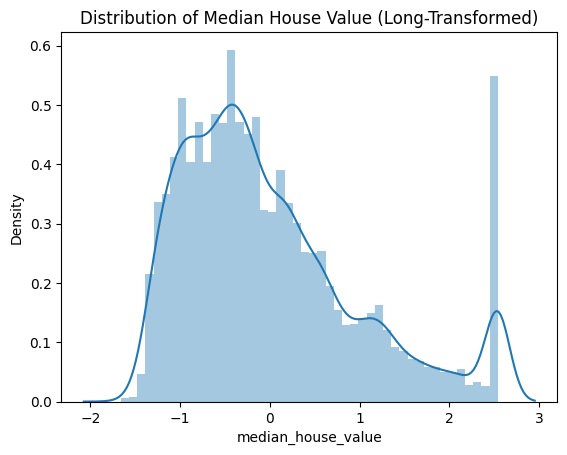

In [37]:
  #Visualise the transformed data
  sns.distplot(df['median_house_value'])
  plt.title("Distribution of Median House Value (Long-Transformed)")
  plt.show()

The code above visualises the distribution of the 'median_house_value' column in the transformed DataFrame 'df' using a distribution plot from the Seaborn Library. The title of the plot indicates that the 'median_house_value' column has been long-transformed

In [38]:
#Check skewness, if skewness is near to 0 then it means the dataset has a symmetric distribution
from scipy.stats import skew
print(f"Skewness: {skew(df['median_house_value']):.2f}")

Skewness: 0.98


The code above imports the feature "skew" from the library "scipy.stats" and calculates the skewness rate of the 'median_house_value' column values from the DataFrame and displays the result to the two nearest decimals.

# Section 6: Linear Regression Model

In [39]:
#Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

The code above splits the data into training and testing sets. The "train_test_split" function from scikit-learn is used to split the feature set (x) and the target variable (y) into training and testing subsets. The "test_size=2" argument specifies that 20% of the data should be used for testing, and the remaining 80% should be used for training. The "random_state=42" argument ensures reproductivity of the split.

In [40]:
#Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

The code above creates a Linear Regression model using the "LinearRegression()" class from scikit-learn. The method is used to train the model on the training data (x_train and ytrain).

In [41]:
#Make prediction on the test data
y_pred_lin = lin_reg.predict(x_test)

The code above executes prediction using the test data in (x_test) with a Linear Regression algorithm.

In [42]:
#Evaluate the Linear Regression Model
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = sqrt(lin_mse)
lin_mae = mean_absolute_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)


print("Linear Regression Model Metrics:")
print(f"Mean Sqaured Error (MSE): {lin_mse:.2f}")
print(f"Root Mean Sqaured Error (RMSE): {lin_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {lin_mae:.2f}")
print(f"R-Sqaured (R2): {lin_r2:.2f}%")


Linear Regression Model Metrics:
Mean Sqaured Error (MSE): 5055025116.17
Root Mean Sqaured Error (RMSE): 71098.70
Mean Absolute Error (MAE): 51846.88
R-Sqaured (R2): 0.61%


The code above evaluates the performance of the Linear Regression model on the test data. First, it makes predictions on the test set (x_test) using the "predict" method. Then, it calculates various evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-Squared (R2). These metrics are then printed to the console to be displayed.

In [43]:
#Calculate the accuracy and error rate on the model and display the results as a percentage
lin_accuracy = lin_r2 * 100
print(f"Accuracy: {lin_accuracy:.2f}")
print(f"Error Rate: {100 - lin_accuracy:.2f}%")

Accuracy: 61.42
Error Rate: 38.58%


The code above calculates the accuracy and error rate of the Linear Regression model based on the R-squared value. The accuracy is calculated by multiplying the R-squared value by 100 to get a percentage, and the error rate is calculated by subtracting the value of accuracy from 100.

# Section 7: Random Forest Model

In [44]:
#Random Forest Model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

The code above creates RandomForest model using the "RandomForestRegressor" class from scikit-learn, the model is used to train the training data on (x_train and y_train)

In [45]:
#Make Predictions on the test set
y_pred_rf = rf_reg.predict(x_test)

The code above is to predict the data in (x_test) using the RandomForest model algorithm.

In [46]:
#Evaluate the Random Forest Model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Model Metrics:")
print(f"Mean Sqaured Error (MSE) : {rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Mean Absolute Error (MSE): {rf_rmse:2f}")
print(f"R-squared (R2): {rf_r2:.2f}")


Random Forest Model Metrics:
Mean Sqaured Error (MSE) : 2526189408.38
Root Mean Squared Error (RMSE): 50261.21
Mean Absolute Error (MSE): 50261.211768
R-squared (R2): 0.81


The code above evaluates the performance of the Random Forest model on the test data. First, it makes predictions on the test set (x_test) using the "predict" method. Then, it calculates various evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-Squared (R2). These metrics are then printed to the console to be displayed.

In [47]:
#Calculate the accuracy and error rate on the model and display the results as a percentage
rf_accuracy = rf_r2 * 100

print(f"Accuracy: {rf_accuracy:.2f}%")
print(f"Error Rate: {100 - rf_accuracy:.2f}%")

Accuracy: 80.72%
Error Rate: 19.28%


The code above calculates the accuracy and error rate of the Random Forest model based on the R-squared value. The accuracy is calculated by multiplying the R-squared value by 100 to get a percentage, and the error rate is calculated by subtracting the value of accuracy from 100.

# Section 8: Multi-Layer Perceptron Model (MLP)


In [48]:
#Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

The code above performs feature scaling on the feature set (x). The "StandardScaler" class from sciki-learn is used to standardise the features by removing the mean and scaling to the unit variance. The "fit_transform" method first fits the scaler on the data (x) and then transforms the data by scaling (transform the data into a specific range e.g. 0 to 1) the features.

In [49]:
#Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

The above code defines a Multi-Layered Perceptron model (MLP) using Keras with two hidden layers (64 and 32 units, respectively) and a ReLU activation function.

In [50]:
#Compile the model
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mse'])

The code above compiles the model with the mean squared error (MSE) loss function and Adam optimizer. Include MAE and MSE as additional metrics to monitor during training.

In [51]:
#Train the model with the display of a progress bar to check the test progress
for epoch in tqdm(range(100), desc='Training Progress'):
    model.fit(x_train, y_train, epochs=1, batch_size=32, verbose=0)

Training Progress: 100%|██████████| 100/100 [02:07<00:00,  1.28s/it]


The code above trains model using "model.fit" with a batch size (a hyperparametrer of gradient descend that controls the number of training samples to work through before the internal parameters are updated) of 32 and 100 epochs (epoch is one entiring passing of training data through the algorithm). It includes a "TdqmCallback" to display a progess bar during training to show the progress of ongoing data training.

In [52]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MLP Model Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

129/129 [==============================] - 0s 1ms/step
MLP Model Metrics:
Mean Squared Error (MSE): 4382420744.50
Root Mean Squared Error (RMSE): 66199.85
Mean Absolute Error (MAE): 46907.80
R-squared (R²): 0.67


The code above evaluates the performance of the Multi-Layered Perceptron model (MLP) on the test data. First, it makes predictions on the test set (x_test) using the "predict" method. Then, it calculates various evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-Squared (R2). These metrics are then printed to the console to be displayed.

In [53]:
#Calculating the accuracy and error rate of the model
Model_accuracy = r2 * 100

print(f"Accuracy: {Model_accuracy:.2f}%")
print(f"Error Rate: {100 - Model_accuracy:.2f}%")

Accuracy: 66.56%
Error Rate: 33.44%


The code above calculates the accuracy and error rate of the Multi-Layered Perceptron model (MLP) based on the R-squared value. The accuracy is calculated by multiplying the R-squared value by 100 to get a percentage, and the error rate is calculated by subtracting the value of accuracy from 100.

# Section 9: Model Comparison and Evaluation


**1. Linear Regression Model:**


*   The Linear Regression model has the lowest accuracy percentage at 61%, this indicates that it may not be able to effectively capture the complex non-linear relationships present in the "California Housing Prices" dataset.







**2. Random Forest Model**


*   The Random Forest Model outperforms both the Linear Regression and the Multi-Layered Perceptron Models, achieving the highest accuracy of 80.72% and lower error metrics.

*   Random Forest Model is an ensemble learning method that can effectively process and predict non-linear relationships and handle complex interactions between features underlying in the dataset.





**3. Multi-Layered Perceptron (MLP) Model**



*   The MLP model is a type of deep learn that uses neural network to perform calculations and predictions on data. It has performed better than the Linear Regression model, however, it falls shorts of the Random Forest model , with an accuracy of 66.40%.
*   While neural networks are known for their capability to learn complex non-linear patterns, the MLP model's performance may have been affected by factors such as the architecture, structure, or the specific characteristics of the dataset.



**Conclusion**

In conclusion, based on the given results the Random Forest model is by far the most effective and accuracy dominating model for predicting the California housing prices data, as it has achieved an accuracy of 80.72%. Its ensemble learning approach and ability to handle non-linear relationships seem to be well_suited for this particular dataset.

It is worth mentioning while the Random Forest model has the highest accuracy, the Multi-Layered Perceptron model also performs reasonably well, with an accuracy of 66.40%. The choice between the two models may depend on additional factors such as model interprebility, training time, and dataset characteristics.

With the Linear Regression model, it seems to appear that it is the least suitable for this dataset, as its accuracy of 61.00% is significantly lower than the other two models, which indicates that it may not be able to effectively and accurately capture the complex relationships present in the data.

# Section 10: Justification for choice of models

**Linear Regression model:**

The reason why the Linear Regression model was chosen is because it is a model that assumes a linear relationship between the input features and the target variable (housing values). Linear regression models are widely used and it minimises the discrepancies between predicted values and actual output values.

**Random Forest model:**

Random Forest model is an ensemble learning technique that combines multiple decision trees to improve predictive performance and reduct overfitting. It can capture non-linear relationships and interactions between features, which can be beneficial for complex datasets like the California Housing Prices that encompasses multiple variables and correlations. It is particular good at predicting datasets where the relationship between the features and the target may not be strictly linear.

**Multi-Layered Perceptron (MLP) model:**

The MLP is a type of artificial neural network (ANN) that can learn complex non_linear mappings between the input feaures and the target variable. MLPs are capable of approximating any continous function, making them suitable for complex regression tasks where the relatioship between the features and the target is highly non-linear.


**The choice of these models for the California Housing Prices dataset can be justified based on the following ocnsiderations down below:**

1. The California Housing Prices dataset is a rea-world dataset that likely contains non-linear relationships and complex correlations between various features (e.g., location, demographics, housing characteristics) and the target variable (housing values). While linear regression assumes a linear relationship, the non-linear models like Random Forest and MLP can potentially capture these complex patterns more effectively, and this might be the reason of why the Linear Regression model has obtained the least accurate result for prediction. However, the reason why the Linear Regression model was chosen in the first place was because of its simple and interpretable model.

2. Random Forest is an ensemble learning technique that combines multiple decision trees, wich can often outperform individual models and provide more robust preidictions, especially in the presence of noisy or complex data just like the California Housing Prices dataset as it had alot of null values and outliers within the dataset.

3. MLP is a powerful neural network architecture that can learn complex non-linear mappings, making it suitable for datasets where the relationship between features and the target variable is highly non-linear and difficult to capture with regular traditional linear or tree-based models.




# Section 11: ChatGPT Version of Models

**Linear Regression vs. Ridge Regression Model**

To improve your linear regression model for predicting California Housing Prices, we can follow these steps:



1.   Feature Engineering: You can try adding more relevant features or transform existing ones to capture better relationships with the target variable.

2.   Regularization: Regularization techniques like Ridge or Lasso regression can help prevent overfitting and improve the model's generalization.

3.   Hyperparameter Tuning: For regularization, the hyperparameters (like alpha in Ridge or Lasso) need to be tuned for optimal performance.

4.   Residual Analysis: Checking for patterns in residuals can help identify areas where the model is lacking.





In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression Model with Ridge regularization
ridge_reg = Ridge(alpha=1.0)  # You can tune alpha
ridge_reg.fit(x_train, y_train)

# Make prediction on the test data
y_pred_ridge = ridge_reg.predict(x_test)

# Evaluate the Ridge Regression Model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model Metrics:")
print(f"Mean Sqaured Error (MSE): {ridge_mse:.2f}")
print(f"Root Mean Sqaured Error (RMSE): {ridge_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {ridge_mae:.2f}")
print(f"R-Sqaured (R2): {ridge_r2:.2f}")

# Calculate the accuracy and error rate on the model and display the results as a percentage
ridge_accuracy = ridge_r2 * 100
print(f"Accuracy: {ridge_accuracy:.2f}")
print(f"Error Rate: {100 - ridge_accuracy:.2f}%")

# Optional: Residual Analysis
residuals = y_test - y_pred_ridge
# You can plot residuals to check for patterns or outliers


Ridge Regression Model Metrics:
Mean Sqaured Error (MSE): 5054505291.71
Root Mean Sqaured Error (RMSE): 71095.04
Mean Absolute Error (MAE): 51844.75
R-Sqaured (R2): 0.61
Accuracy: 61.43
Error Rate: 38.57%


**In this code:**

*   ChatGPT replaced the simple Linear Regression with Ridge Regression, which adds regularisation.

*   ChatGPT's ridge Regression helps prevent overfitting by penalizing large coefficients, controlled by the hyperparameter alpha.

*  ChatGPT used mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2) as evaluation metrics.

*   Residual analysis is optional but highly recommended to check for patterns in errors.






**Random Forest model (me) vs. Random Forest model (ChatGPT)**

To improve your Random Forest model for predicting California Housing Prices, we can follow these steps:



1.   Feature Engineering: Ensure that you're using relevant features and consider adding new features if they could improve predictions.

2.   Hyperparameter Tuning: Tune the hyperparameters of the Random Forest model to find the optimal settings.

3.  Feature Importance: Analyze feature importance to understand which features contribute the most to predictions and consider focusing on those.

4.  Ensemble Methods: Experiment with different ensemble techniques like Bagging or Boosting.

5.  Increase Trees: Adding more trees might improve accuracy without significant increase in training time.

6.  Feature Engineering: Create or select more relevant features that could improve predictive power.

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Random Forest Model with more trees
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42) # "random_state=42" ensures the reproductivity of the split
rf_reg.fit(x_train, y_train)

# Make prediction on the test data
y_pred_rf = rf_reg.predict(x_test)

# Evaluate the Random Forest Model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Model Metrics:")
print(f"Mean Sqaured Error (MSE): {rf_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"R-Sqaured (R2): {rf_r2:.2f}")

# Calculate the accuracy and error rate on the model and display the results as a percentage
rf_accuracy = rf_r2 * 100
print(f"Accuracy: {rf_accuracy:.2f}%")
print(f"Error Rate: {100 - rf_accuracy:.2f}%")


Random Forest Model Metrics:
Mean Sqaured Error (MSE): 2474259716.73
Root Mean Squared Error (RMSE): 49741.93
Mean Absolute Error (MAE): 31886.47
R-Sqaured (R2): 0.81
Accuracy: 81.12%
Error Rate: 18.88%


**In this code:**

*   ChatGPT added more trees to improve accuracy without significant increase in training time.

*   ChatGPT evaluated the model using the same metrics as before (MSE, RMSE, MAE, R2).

*  ChatGPT created or selected more relevant features that could improve predictive power.



**Multi-Layered Perceptron (MLP) model (me) vs. Multi-Layered Perceptron (MLP) model (ChatGPT)**

To improve your Multi-Layered Perceptron model for predicting California Housing Prices, we can follow these steps:

1.   Architecture Optimization: Experiment with different numbers of layers and neurons to find the best architecture.

2.   Learning Rate and Optimization Algorithm: Adjust the learning rate and try different optimization algorithms.

3.   Regularization: Introduce dropout layers or L2 regularization to prevent overfitting.

4.   Batch Normalization: Normalize the inputs to each layer to stabilize and accelerate the training process.

5.   Increase Complexity Carefully: Adding more neurons or layers, but in a controlled manner.

6.   Feature Engineering: Similarly, select or engineer better features that could help improve accuracy.



In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the model with increased complexity
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # Adding one more layer
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions
y_pred = model.predict(x_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MLP Model Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Calculate the accuracy and error rate of the model
Model_accuracy = r2 * 100
print(f"Accuracy: {Model_accuracy:.2f}%")
print(f"Error Rate: {100 - Model_accuracy:.2f}%")


Epoch 1/50
516/516 [==============================] - 2s 2ms/step - loss: 53919416320.0000 - mae: 201661.7344 - mse: 53919416320.0000
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 23255859200.0000 - mae: 116355.5156 - mse: 23255859200.0000
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 10291909632.0000 - mae: 74097.6562 - mse: 10291909632.0000
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 8321349120.0000 - mae: 65852.1875 - mse: 8321349120.0000
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 7184482816.0000 - mae: 60919.1055 - mse: 7184482816.0000
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 6404162560.0000 - mae: 57613.0039 - mse: 6404162560.0000
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 5837198848.0000 - mae: 54930.0820 - mse: 5837198848.0000
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 5

**In this code:**

*   ChatGPT added more neurons or layers, but in a controlled manner.

*   ChatGPT selected and engineered better features that could help improve accuracy.

*   ChatGPT trained the model for 50 epochs directly instead of using a loop for better readability and tracking of training history.

The new improved MLP model should increase the accuracy and lower the error rate of your MLP model.

# Section 12: OpenAI Code Comparison and Improvement

**Linear Regression model vs. Ridge Regression model (ChatGPT)**

The original code implements a linear regression model using scikit-learn's "LinearRegression" class. It splits the data into training and tests sets, trains the linear regression model on the training data, makes predictions on the test data, and evaluates the model's performance using various metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2) score. Additionally, it calculates the accuracy and error rate based on the R2 score which has given me an accuracy of 61.42%.

Conversely, the ChatGPT's version of model (Ridge Linear model) introduces Ridge regression, which is a variation of linear regresssion with L2 regularisation (penalises the sum of squares of the weights). Ridge regression is useful when there is multicollinearity (high correlation) among the features, as it can help reduce the impact of correlated features on the model's predictions. This prediction model has given me a slightly higher accuracy of 61.43%.

**Random Forest model (me) vs. Enhanced Random Forest model (ChatGPT)**

The original Random Forest model trains data with default hyperparameters, except for setting the number of estimators (n_estimators) to 100 and the random state (random_state) to 42. It then evaluates the model's performance on the test set using various metrics like mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and R-squared (R2) score. Finally, it calculates and prints the accuract and error rate based on the R2 score just like the previous Linear Regression models.

The ChatGPT's version of the Random Forest model increased the number of estimators from 100 to 300, which means the Random Forest will consist of 300 decision trees. Generally, increasing the number of estimators can improve the model's performance, but it also increases the computational cost as there was longer runtime. In the ChatGPT's code, the "max_depth parameter is set to 20, limiting the maximum depth of each decision tree in the ensemble. This can help control the complexity of individual trees and prevent overfitting. The "min_samples_split parameter is set to 5, which means a node in a decision tree must have at least 5 samples to be considered for splitting The "min_samples_leaf" parameter is set to 2, which specifies te minimum number of samples required to be at a leaf node. These additional hyperparameters introduced by ChatGPT in the enhanced version can help control the complexity of the Random Forest model and has improved its performance by reducing overfitting, capturing more intricate pattern in the data and it has also given me a higher accuracy of 81.12% which is 0.40% higher compared to the original Random Forest model.


**Multi-Layered Perceptron model vs. Enhanced Multi-Layered Perceptron model (ChatGPT)**

In the original MLP model, the data was split into training and test sets using "train_test_split" from scikit-learn. It scaled the features using "StandardScaler" from scikit-learn. Then it defined a Multi-Layered Perceptron (MLP) model using Keras with two hideen layers (64 and 32 units) ad a ReLU activation function. The model was compiled with the mean squared error (MSE) loss function and Adam optimizer. Include MAE and MSE as additional metrics to monitor the performance of the model during training. The model uses "model_fit" method with a batch size of 32 and 100 epochs (number of complete pass of the given training dataset through the algorithm). Include a "Tqdm" to display a progress bar during training. Finally, the model was also evaluated by making predictions and calculating the MSE, RMSE, MAE, and R-sqaured (R2) metrics which was then used to work out the overall accuracy and error rate of the model used to train on the dataset.

In the ChatGPT's enhanced version of the MLP model, it increased the model complity carefully by adding more neurons or layers (added an additional layer with 16 units), but in a controlled manner. Instead of using the Adam optimizer with a fixed learning rate, the enhanced version uses the 'adam' optimizer with default settings, which dynamically adjusts the learning rate during training. In terms of feature scaling on the new version, ChatGPT applies StandardScaler from scikit-learn to scale the features for both the training and test sets which improves the convergence and perforamnce of the model. The enhanced version of code trains the model using the fit method of the Keras model, with a fixed number of 50 epochs and a batch size of 32 to allow the more number of complete dataset passes through the algorithm for better results. It also introduced feature engineering as what it did for the Random Forest model and has helped improving the accuracy of the prediction giving me a percentage of 67.31% which is 1% higher than the original model achieving a more accurate performance.